In [44]:
import pandas as pd
from plotnine import *
import numpy as np
import re

%matplotlib inline

# Day 1
## Part 1

In [16]:
df = pd.read_csv("data/input1.txt", header=None, names=["Expense"])

In [17]:
df

,Expense
0,1287
1,1366
2,1669
3,1724
4,1338
...,...
195,1862
196,1430
197,1793
198,1901


In [18]:
def sum2020(data):
    for i in range(len(data)):
        for j in range(i, len(data)):
            if data[i] + data[j] == 2020:
                print(data[i], data[j])
                return data[i] * data[j]

In [19]:
sample = [1721, 979, 366, 299, 675, 1456]
sum2020(sample)

1721 299


514579

In [20]:
sum2020(df["Expense"].values)

437 1583


691771

## Part 2

In [21]:
def sumthree2020(data):
    for i in range(len(data)):
        for j in range(i, len(data)):
            for k in range(j, len(data)):
                if data[i] + data[j] + data[k] == 2020:
                    print(data[i], data[j], data[k])
                    return data[i] * data[j] * data[k]

In [22]:
sample = [1721, 979, 366, 299, 675, 1456]
sumthree2020(sample)

979 366 675


241861950

In [23]:
sumthree2020(df["Expense"].values)

717 335 968


232508760

# Day 2
## Part 1

In [24]:
sample = ["1-3 a: abcde", "1-3 b: cdefg", "2-9 c: ccccccccc"]

In [25]:
def num_valid(pwords):
    count = 0
    for p in pwords:
        pieces = p.split()
        t = pieces[2].count(pieces[1][0])
        low, high = [int(x) for x in pieces[0].split("-")]
        if low <= t <= high:
            count += 1
    return count

In [26]:
num_valid(sample)

2

In [27]:
fin = open("data/input2.txt")
data = fin.readlines()
fin.close()

In [28]:
num_valid(data)

636

## Part 2

In [29]:
def num_valid(pwords):
    count = 0
    for p in pwords:
        pieces = p.split()
        first, second = [int(x) - 1 for x in pieces[0].split("-")]
        nw = pieces[2][first] + pieces[2][second]
        c = pieces[1][0]
        if nw.count(c) == 1:
            count += 1
    return count

In [30]:
num_valid(sample)

1

In [31]:
num_valid(data)

588

# Day 3
## Puzzle 1

In [32]:
sample = ["..##.......",
"#...#...#..",
".#....#..#.",
"..#.#...#.#",
".#...##..#.",
"..#.##.....",
".#.#.#....#",
".#........#",
"#.##...#...",
"#...##....#",
".#..#...#.#",
]

In [33]:
sample

['..##.......',
 '#...#...#..',
 '.#....#..#.',
 '..#.#...#.#',
 '.#...##..#.',
 '..#.##.....',
 '.#.#.#....#',
 '.#........#',
 '#.##...#...',
 '#...##....#',
 '.#..#...#.#']

In [34]:
def num_trees(right, down, trees):
    count = 0
    loc = [0, 0]
    while loc[0] < len(trees):
        loc[0] += down
        loc[1] += right
        loc[1] %= len(trees[0])
        if loc[0] < len(trees):
            #print(loc, trees[loc[0]][loc[1]])
            if trees[loc[0]][loc[1]] == "#":
                count += 1
    return count

In [35]:
num_trees(3, 1, sample)

7

In [36]:
fin = open("data/input3.txt")
treemap = [line.strip() for line in fin.readlines()]
fin.close()

In [37]:
num_trees(3, 1, treemap)

191

## Part 2

In [38]:
slopes = [(1, 1), (3, 1), (5, 1), (7, 1), (1, 2)]

In [39]:
def all_paths(slope_list, data):
    num = 1
    for r, d in slopes:
        num *= num_trees(r, d, data)
    return num

In [40]:
all_paths(slopes, sample)

336

In [41]:
all_paths(slopes, treemap)

1478615040

# Day 4
## Part 1

In [2]:
expected = set(["byr", "iyr", "eyr", "hgt", "hcl", "ecl", "pid", "cid"])

In [3]:
np_expected = expected.copy()
np_expected.remove("cid")

In [4]:
def make_pdict(s):
    d = {}
    for field in s.split():
        k, v = field.split(":")
        d[k] = v
    return d

In [5]:
def get_data(filename):
    passports = []
    fin = open(filename)
    current = ""
    for line in fin:
        if line.strip() != "":
            current += " " + line.strip()
        else:
            passports.append(make_pdict(current))
            current = ""
    passports.append(make_pdict(current))
    return passports

In [6]:
def count_valid(filename):
    count = 0
    ps = get_data(filename)
    for p in ps:
        if set(p.keys()).issuperset(np_expected):
            count += 1
    return count

In [7]:
count_valid("data/input4sample.txt")

2

In [8]:
count_valid("data/input4.txt")

242

## Part 2

In [9]:
def int_valid(s, low, high):
    if not s.isdigit():
        return False
    y = int(s)
    return low <= y <= high

In [10]:
int_valid("2003", 1920, 2002)

False

In [11]:
def length_valid(s, low, high, num):
    return len(s) == num and int_valid(s, low, high)

In [12]:
def count_valid(filename):
    data = {}
    for field in np_expected:
        data[field] = []
    
    count = 0
    ps = get_data(filename)
    for p in ps:
        if set(p.keys()).issuperset(np_expected):
            valid = True
            valid &= length_valid(p["byr"], 1920, 2002, 4)
            valid &= length_valid(p["iyr"], 2010, 2020, 4)
            valid &= length_valid(p["eyr"], 2020, 2030, 4)
            #hgt
            hgt = p["hgt"]
            if hgt[-2:] == "cm":
                valid &= int_valid(hgt[:-2], 150, 193)
            elif hgt[-2:] == "in":
                valid &= int_valid(hgt[:-2], 59, 76)
            else:
                valid = False
            #hcl https://stackoverflow.com/questions/30241375/python-how-to-check-if-string-is-a-hex-color-code
            valid &= bool(re.search(r'^#(?:[0-9a-fA-F]{3}){1,2}$', p["hcl"]))
            valid &= p["ecl"] in {"amb","blu","brn","gry","grn","hzl","oth"}
            valid &= length_valid(p["pid"], 0, 999999999, 9)
            if valid:
                for field in np_expected:
                    if field == "hgt":
                        hgt = p["hgt"]
                        if hgt[-2:] == "cm":
                            data[field].append(int(hgt[:-2]) * 0.393701)
                        else:
                            data[field].append(int(hgt[:-2]))
                    else:
                        data[field].append(p[field])
                count += 1
    return count, data

In [13]:
count_valid("data/input4-2valid.txt")

(4,
 {'hgt': [74, 64.960665, 64.566964, 62.204758000000005],
  'byr': ['1980', '1989', '2001', '1944'],
  'iyr': ['2012', '2014', '2015', '2010'],
  'eyr': ['2030', '2029', '2022', '2021'],
  'ecl': ['grn', 'blu', 'hzl', 'blu'],
  'hcl': ['#623a2f', '#a97842', '#888785', '#b6652a'],
  'pid': ['087499704', '896056539', '545766238', '093154719']})

In [14]:
count_valid("data/input4-2invalid.txt")

(0,
 {'hgt': [], 'byr': [], 'iyr': [], 'eyr': [], 'ecl': [], 'hcl': [], 'pid': []})

In [15]:
c, data = count_valid("data/input4.txt")

In [16]:
c

186

In [17]:
df = pd.DataFrame(data)
df["byr"] = pd.to_datetime(df["byr"])

In [18]:
df

,hgt,byr,iyr,eyr,ecl,hcl,pid
0,63.385861,1977-01-01,2011,2027,grn,#a97842,910468396
1,73.228386,1941-01-01,2012,2029,gry,#cfa07d,108935675
2,59.448851,1966-01-01,2012,2020,grn,#ceb3a1,947726115
3,61.023655,1966-01-01,2012,2027,hzl,#888785,853607760
4,75.196891,1923-01-01,2019,2025,gry,#a97842,574171850
...,...,...,...,...,...,...,...
181,61.811057,1981-01-01,2020,2020,amb,#7d3b0c,854208004
182,66.929170,1924-01-01,2010,2028,amb,#cfa07d,036669613
183,68.110273,1966-01-01,2010,2028,grn,#ceb3a1,074363489
184,68.897675,1952-01-01,2016,2024,brn,#fffffd,085432899


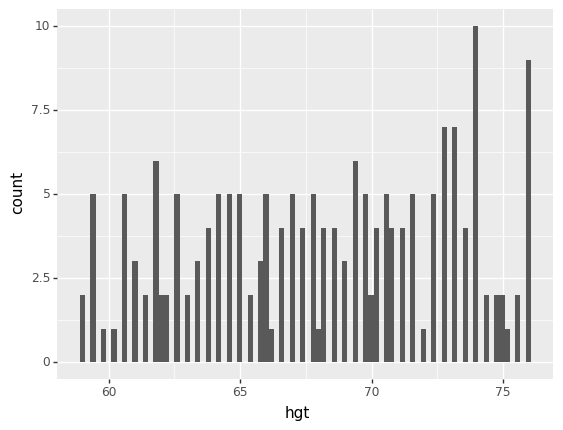

<ggplot: (8778598789235)>

In [19]:
ggplot(df, aes(x="hgt")) \
+ geom_histogram(bins=86)

In [20]:
df.to_csv("data/valid_travelers.csv")

In [21]:
from libs.graphics import *

ec = {"amb":"#ffbf00",
      "blu":"#85abce",
      "brn":"#654321",
      "gry":"#c2c5cc",
      "grn":"#6ca580",
      "hzl":"#b5ae6e",
      "oth":"#800080"}

def main():
    win = GraphWin("My First Drawing", 1200, 1200)

    for i, row in df.iterrows():
        r = Rectangle(Point(30 + (i % 33) * 35, 100 - row["hgt"] + 110 * (i // 33)), Point(50 + (i % 33) * 35, 100 + 110 * (i // 33)))
        r.setFill("#000000")

        r.draw(win)
        #s = Line(Point(10, 50), Point(70, 60))

        c = Circle(Point(40 + (i % 33) * 35, 100 - row["hgt"] - 5 + 110 * (i // 33)), 10)
        c.draw(win)
        c.setFill(row["hcl"])
        c.setOutline(row["hcl"])
        c = Circle(Point(40 + (i % 33) * 35, 100 - row["hgt"] + 110 * (i // 33)), 9)
        c.draw(win)
        c.setOutline("#a1665e")
        c.setFill("#a1665e")
        c = Circle(Point(35 + (i % 33) * 35, 100 - row["hgt"] + 110 * (i // 33)), 3)
        c.draw(win)
        c.setOutline("#FFFFFF")
        c.setFill(ec[row["ecl"]])
        c = Circle(Point(45 + (i % 33) * 35, 100 - row["hgt"] + 110 * (i // 33)), 3)
        c.draw(win)
        c.setOutline("#FFFFFF")
        c.setFill(ec[row["ecl"]])
        #s.draw(win)

    win.getMouse()
    win.close()

main()

KeyboardInterrupt: 

# Day 5
## Part 1

In [34]:
def bsearch(s, space, small):
    l, h = 0, space * 2
    for d in s:
        if d == small:
            h -= space
        else:
            l += space
        space //= 2
    return l  

In [35]:
def seat(bsp):
    row = bsearch(bsp[:7], 64, "F")
    column = bsearch(bsp[7:], 4, "L")
    sid = row * 8 + column
    #print(row, column, sid)
    return sid

In [36]:
seat("FBFBBFFRLR") # 357  44 * 8 + 5

357

In [37]:
seat("BFFFBBFRRR")# : row 70, column 7, seat ID 567.

567

In [38]:
seat("FFFBBBFRRR")# : row 14, column 7, seat ID 119.

119

In [39]:
seat("BBFFBBFRLL")# : row 102, column 4, seat ID 820.")

820

In [40]:
def sanity():
    fin = open("data/input5.txt")
    data = fin.readlines()
    fin.close()
    max_id = 0
    for line in data:
        sid = seat(line.strip())
        if sid > max_id:
            max_id = sid
    return max_id

In [41]:
sanity()

835

## Part 2

In [42]:
def missing():
    fin = open("data/input5.txt")
    data = fin.readlines()
    fin.close()
    open_seats = set(range(836))
    for line in data:
        sid = seat(line.strip())
        open_seats.remove(sid)
    return open_seats

In [43]:
missing()

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 649}

# Day 6
## Part 1

In [55]:
def common():
    fin = open("data/input6.txt")
    data = fin.readlines()
    fin.close()
    common = set()
    total = 0
    current = ""
    for line in data:
        if line.strip() != "":
            current += line.strip()
        else:
            total += len(set(current))
            current = ""
    total += len(set(current))
    return total

In [56]:
set("abc")

{'a', 'b', 'c'}

In [57]:
common()

6763

## Part 2

In [86]:
def common2():
    fin = open("data/input6.txt")
    data = fin.readlines()
    fin.close()
    total = 0
    current = ""
    for line in data:
        if line.strip() != "":
            current += line
        else:
            people = current.split("\n")
            print(people)
            common = set(people[0])
            print(common)
            for p in people[1:-1]:
                common = common.intersection(set(p))
                print(common)
            total += len(common)
            print(total)
            current = ""
    people = current.split("\n")
    common = set(people[0])
    print(common)
    for p in people[1:-1]:
        common = common.intersection(set(p))
        print(common)
    total += len(common)
    return total

In [84]:
x = common2()

['we', 'euw', 'we', '']
{'e', 'w'}
{'e', 'w'}
{'e', 'w'}
2
['czaxvodqbsjeytwhurpg', 'gclajqykpmxfbohvtedzwrus', '']
{'d', 's', 'h', 'r', 'e', 'c', 'v', 'o', 'q', 'x', 'b', 'p', 'g', 'j', 'u', 'y', 'w', 't', 'a', 'z'}
{'d', 's', 'h', 'r', 'e', 'c', 'v', 'o', 'q', 'x', 'b', 'p', 'g', 'j', 'u', 'y', 'w', 't', 'a', 'z'}
22
['dxoznjqhwuvblprgekyfcm', 'ghbozdkxqjevwfrypcnul', 'rxpjtgwvuoeqfhlkncdbyz', '']
{'d', 'h', 'm', 'r', 'e', 'c', 'f', 'v', 'o', 'q', 'x', 'l', 'b', 'n', 'p', 'g', 'j', 'u', 'y', 'w', 'k', 'z'}
{'d', 'h', 'r', 'e', 'c', 'f', 'v', 'o', 'q', 'x', 'l', 'b', 'n', 'p', 'g', 'j', 'u', 'y', 'w', 'k', 'z'}
{'d', 'h', 'r', 'e', 'c', 'f', 'v', 'o', 'q', 'x', 'l', 'b', 'n', 'p', 'g', 'j', 'u', 'y', 'w', 'k', 'z'}
43
['ralobiy', 'lyairo', 'rzyailop', 'falyismnr', '']
{'y', 'b', 'o', 'r', 'a', 'i', 'l'}
{'y', 'o', 'r', 'a', 'i', 'l'}
{'y', 'o', 'r', 'i', 'a', 'l'}
{'y', 'r', 'a', 'i', 'l'}
48
['rvwzm', 'rm', 'rm', 'rm', 'mr', '']
{'v', 'w', 'm', 'r', 'z'}
{'r', 'm'}
{'r', 'm'}
{'r', '

set()
2555
['hkq', 'pqhn', 'hq', 'bzrhojq', '']
{'q', 'h', 'k'}
{'q', 'h'}
{'q', 'h'}
{'q', 'h'}
2557
['eakwxyubldsh', 'auskeylhwdx', '']
{'d', 'y', 'b', 's', 'h', 'w', 'e', 'k', 'a', 'x', 'l', 'u'}
{'d', 'y', 's', 'h', 'w', 'e', 'k', 'a', 'x', 'l', 'u'}
2568
['pbz', 'zb', 'zpb', 'zjb', '']
{'p', 'b', 'z'}
{'b', 'z'}
{'b', 'z'}
{'b', 'z'}
2570
['ewfhgz', 'hxlqnorbw', 'uwdahmk', '']
{'h', 'g', 'w', 'e', 'z', 'f'}
{'h', 'w'}
{'h', 'w'}
2572
['pzrscjd', 'pszrdcn', 'rzpmdcs', '']
{'d', 's', 'p', 'r', 'j', 'z', 'c'}
{'d', 's', 'p', 'r', 'z', 'c'}
{'d', 's', 'p', 'r', 'z', 'c'}
2578
['cfoemr', 'ocfmeir', 'foercm', 'recofm', '']
{'m', 'o', 'r', 'e', 'c', 'f'}
{'o', 'm', 'r', 'e', 'c', 'f'}
{'m', 'o', 'r', 'e', 'c', 'f'}
{'m', 'o', 'r', 'e', 'c', 'f'}
2584
['s', 'as', 'vs', 's', '']
{'s'}
{'s'}
{'s'}
{'s'}
2585
['auntpvyk', 'nyvtpk', 'vtnkhpy', 'ktqvjwcpny', 'nvykthp', '']
{'y', 'n', 'p', 'v', 't', 'k', 'a', 'u'}
{'y', 'n', 'p', 'v', 't', 'k'}
{'y', 'n', 'p', 'v', 't', 'k'}
{'y', 'n', 'p', 'v'

In [85]:
x

3512